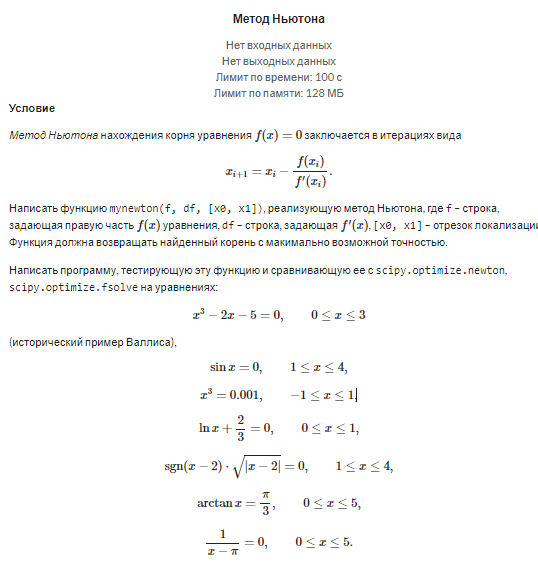

In [110]:
import numpy as np
import pandas as pd
from scipy.optimize import newton, fsolve

In [118]:
def mynewton(f, df, x_range):
    eps = 1e-10
    x_0, x_1 = x_range
    
    iterations_max = 100
    iterations = 0
    
    xi = (x_0 + x_1) / 2
    iterations += 1
    
    while abs(f(xi)) > eps and iterations < iterations_max:
        try:
            x_i = xi - f(xi) / df(xi)  
            
        except ZeroDivisionError: 
            pass
        
        except: 
            return xi, iterations
        
        iterations += 1

    return xi, iterations

In [120]:
def mynewton(f, df, x_range):
    
    x_0, x_1 = x_range
    max_iter = 100
    error = 1e-10
    iterations = 0

    
    x_i = (x_0 + x_1) / 2
    iterations += 1
    
    while abs(f(x_i)) > error and iterations < max_iter:
        try:
            x_i = x_i - f(x_i) / df(x_i)  
            
        except ZeroDivisionError: 
            pass
        
        except: 
            return x_i, iterations
        iterations += 1

    return x_i, iterations

In [122]:

equations = [
    {"func": lambda x: x**3 - 2*x - 5, "deriv": lambda x: 3*x**2 , "interval": [0, 3], "str_fun": 'x^3 - 2*x - 5' },
    {"func": lambda x: np.sin(x), "deriv": lambda x: np.cos(x), "interval": [1, 4], "str_fun": 'sin(x)'},
    {"func": lambda x: np.arctan(x) - np.pi/3, "deriv": lambda x: 1/(1+x**2), "interval": [0, 5], "str_fun": 'arctan(x) - np.pi/3'},
    {"func": lambda x: np.log(x) + 2/3, "deriv": lambda x: 1/x , "interval": [0.01, 1], "str_fun": 'ln(x) + 2/3'}
    
]

tab1 = []

for equation in equations:
    f = equation["func"]
    df = equation["deriv"]
    x_range = equation["interval"]
    str_fun =  equation["str_fun"]

    # Решение уравнения методом Ньютона (mynewton)
    mynewton_root, mynewton_iterations = mynewton(f, df, x_range)
    
    scipy_newton_root = scipy.optimize.newton(f, (x_range[0] + x_range[1]) / 2, fprime=df, full_output=True)

    relative_error_newton = abs(mynewton_root - scipy_newton_root[0]) / abs(scipy_newton_root[0])
    
    scipy_newton_root_iterations = scipy_newton_root[1].iterations
    
    scipy_fsolve_root = scipy.optimize.fsolve(f, (x_range[0] + x_range[1]) / 2, fprime=df, full_output=True)
    
    relative_error_fsolve = abs(mynewton_root - scipy_fsolve_root[0][0]) / abs(scipy_fsolve_root[0][0])
    
    scipy_fsolve_root_iterations = scipy_fsolve_root[1]['nfev']
    
    result = {'Уравнение': str_fun,
            'Решение: mynewton': str(mynewton_root),
            'Решение: scipy.optimize.newton': str(scipy_newton_root[0]),
            'Решение: scipy.optimize.fsolve': str(scipy_fsolve_root[0][0]),
            'Ошибка (scipy.optimize.newton)': str(relative_error_newton),
            'Ошибка(scipy.optimize.fsolve)': str(relative_error_fsolve),
            'Итерации (mynewton)': str(mynewton_iterations),
            'Итерации (scipy.optimize.newton)': str(scipy_newton_root_iterations),
            'Итерации (scipy.optimize.fsolve)': str(scipy_fsolve_root_iterations)
           }
    tab1.append(result)

df1 = pd.DataFrame(tab1)
display(df1)  


,Уравнение,Решение: mynewton,Решение: scipy.optimize.newton,Решение: scipy.optimize.fsolve,Ошибка (scipy.optimize.newton),Ошибка(scipy.optimize.fsolve),Итерации (mynewton),Итерации (scipy.optimize.newton),Итерации (scipy.optimize.fsolve)
0,x^3 - 2*x - 5,2.094551481544912,2.0945514822791216,2.0945514815423265,3.5053307986573437e-10,1.2343871241795577e-12,15,11,8
1,sin(x),3.14159265360993,3.141592653589793,3.141592653589793,6.4097365100569646e-12,6.4097365100569646e-12,4,4,6
2,arctan(x) - np.pi/3,1.732050807568875,1.7320508075688767,1.7320508075688763,1.0255800994045678e-15,7.69185074553426e-16,6,6,8
3,ln(x) + 2/3,0.513417119032592,0.513417119032592,0.513417119032592,0.0,0.0,4,3,5


In [124]:


problem = [
    {"func": lambda x: x**3 - 0.001, "deriv": lambda x: 3 * x**2, "interval": [-1, 1], "str_fun": 'x**3 - 0.001'},
    {"func": lambda x: np.sign(x-2) * np.sqrt(np.abs(x-2)), "deriv": lambda x: 0.5 * np.sign(x-2) / np.sqrt(np.abs(x-2)), "interval": [1, 4], "str_fun": 'sign(x-2) * np.sqrt(np.abs(x-2))'},
    {"func": lambda x: 1/(x-np.pi), "deriv": lambda x: -1/((x-np.pi)**2), "interval": [0, 5], "str_fun": '1/(x-np.pi)'},  
]

tab2 = []

for equation in problem:
    f = equation["func"]
    df = equation["deriv"]
    x_range = equation["interval"]
    str_fun =  equation["str_fun"]

    # Решение уравнения методом Ньютона (mynewton)
    mynewton_root, mynewton_iterations = mynewton(f, df, x_range)
    
    try:    
    #RuntimeError: Failed to converge after 50 iterations, value is -722369108907657.2.    
        scipy_newton_root = scipy.optimize.newton(f, (x_range[0] + x_range[1]) / 2, fprime=df, full_output=True)
    
        
    
    except RuntimeError as e:

        message = str(e)
        scipy_newton_root_iterations = message.split("iterations,")[0].split()[-1]
        scipy_newton_root = message.split("value is")[-1].strip()[:-1]    
     

    
    try:
        scipy_fsolve_root = scipy.optimize.fsolve(f, (x_range[0] + x_range[1]) / 2, fprime=df, full_output=True)
    except:
        scipy_fsolve_root = scipy.optimize.fsolve(f, (x_range[0] + x_range[1]) / 2, full_output=True)
                                   
    relative_error_fsolve = abs(mynewton_root - scipy_fsolve_root[0][0]) / abs(scipy_fsolve_root[0][0])
    
    scipy_fsolve_root_iterations = scipy_fsolve_root[1]['nfev']
                                
    row = {'Уравнение': str_fun,
            'Решение: mynewton': str(mynewton_root),
            'Решение: scipy.optimize.newton': scipy_newton_root,
            'Решение: scipy.optimize.fsolve': str(scipy_fsolve_root[0][0]),
            'Ошибки (scipy.optimize.fsolve)': str(relative_error_fsolve),
            'Итерации (mynewton)': str(mynewton_iterations),
            'Итерации (scipy.optimize.newton)': scipy_newton_root_iterations,
            'Итерации (scipy.optimize.fsolve)': str(scipy_fsolve_root_iterations)
           }
    tab2.append(row)

df2 = pd.DataFrame(tab2)
display(df2)  


C:\Users\stale\AppData\Local\Temp\ipykernel_6724\866669698.py:43: RuntimeWarning: invalid value encountered in double_scalars
  relative_error_fsolve = abs(mynewton_root - scipy_fsolve_root[0][0]) / abs(scipy_fsolve_root[0][0])


,Уравнение,Решение: mynewton,Решение: scipy.optimize.newton,Решение: scipy.optimize.fsolve,Ошибки (scipy.optimize.fsolve),Итерации (mynewton),Итерации (scipy.optimize.newton),Итерации (scipy.optimize.fsolve)
0,x**3 - 0.001,0.0,0.0,0.0,nan,100,1,11
1,sign(x-2) * np.sqrt(np.abs(x-2)),-2.863208448511177e+46,-1.196496646153088e+23,2.0,1.4316042242555886e+46,100,50,3
2,1/(x-np.pi),-11022477854.946484,-722369108907657.2,-2.9126618709948105e+41,1.0,35,50,200
